# Classification algorithms on white wine dataset

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import KFold

## Preparing data

In [2]:
data = pd.read_csv('winequality-white.csv', delimiter=';')
X = data.iloc[:,:11]
y = data.iloc[:,11]

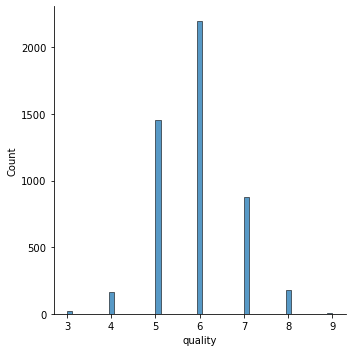

In [3]:
dist_plt = sns.displot(y)

In [4]:
#splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
#10-fold
cv = KFold(n_splits=10, shuffle=True)

#Scaling
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

## Cross-validation - picking the right classifier

In [5]:
def getAverage(lst):
    return sum(lst) / len(lst)
    
lstSVC = cross_val_score(SVC(), X, y, cv=cv)
lstRF = cross_val_score(RandomForestClassifier(), X, y, cv=cv)
lstKN = cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

print('accuracy of SVC: ', lstSVC)
print('avg: ', getAverage(lstSVC))
print('accuracy of RF', lstRF)
print('avg: ', getAverage(lstRF))
print('accuracy of KN', lstKN)
print('avg: ', getAverage(lstKN))

accuracy of SVC:  [0.53877551 0.57959184 0.61428571 0.57142857 0.60408163 0.54693878
 0.58163265 0.59387755 0.57055215 0.55010225]
avg:  0.5751266641625975
accuracy of RF [0.70816327 0.74285714 0.69183673 0.65918367 0.68979592 0.7122449
 0.68367347 0.71428571 0.67075665 0.70143149]
avg:  0.6974228955385835
accuracy of KN [0.54489796 0.50816327 0.58163265 0.58979592 0.51632653 0.54897959
 0.53673469 0.59795918 0.5603272  0.59100204]
avg:  0.557581903927215


## KNN Algorithm

In [6]:
results = []

# Calculating accuracy for n_neighbors values in [10, 100]
for i in range(10, 100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    accuracy = np.mean(cross_val_score(knn, X, y, cv=cv))
    results.append(accuracy)                        

Text(0, 0.5, 'Accuracy')

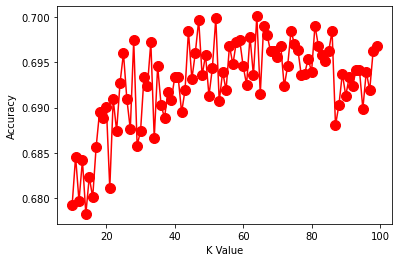

In [7]:
plt.plot(range(10, 100), results, color='red', linestyle='solid', marker='o', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [8]:
max(results)

0.7000905638328951

## Random Forest Algorithm

In [9]:
n_estimators_list = [150,250, 350]
min_samples_split_list = [2,5,10]
min_samples_leaf_list = [1,2,4]

results = []

for n_estimators in n_estimators_list:
    for min_samples_split in min_samples_split_list:
        for min_samples_leaf in min_samples_leaf_list:
            rf_classifier = RandomForestClassifier(
                n_estimators=n_estimators,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                )
            accuracy = np.mean(cross_val_score(rf_classifier, X, y, cv=cv))
            results.append([accuracy, n_estimators, min_samples_split, min_samples_leaf])                        
results = pd.DataFrame(results)
results.columns = ['accuracy', 'n_estimators', 'min_samples_split', 'min_samples_leaf']
pd.DataFrame(results)

,accuracy,n_estimators,min_samples_split,min_samples_leaf
0,0.698439,150,2,1
1,0.695389,150,2,2
2,0.659053,150,2,4
3,0.703973,150,5,1
4,0.692520,150,5,2
5,0.660274,150,5,4
6,0.679255,150,10,1
7,0.674153,150,10,2
8,0.655159,150,10,4
9,0.701711,250,2,1


In [10]:
results[results['accuracy'] == results['accuracy'].max()]

,accuracy,n_estimators,min_samples_split,min_samples_leaf
12,0.706006,250,5,1


In [16]:
rf_classifier = RandomForestClassifier(n_estimators=250, min_samples_split=5, min_samples_leaf = 1)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print('accuracy: ', np.mean(rf_pred == y_test))

accuracy:  0.710204081632653


## Support Vector Machines

In [13]:
#implementing SVM with three different kernels
kernels = ['linear','poly','rbf','sigmoid']
results = []
for k in kernels:
    sv_classifier = SVC(kernel=k)
    accuracy = np.mean(cross_val_score(sv_classifier, X, y, cv=cv)) 
    results.append([accuracy, k])
results = pd.DataFrame(results)
results.columns = ['accuracy', 'kernel']
pd.DataFrame(results)

,accuracy,kernel
0,0.520826,linear
1,0.531237,poly
2,0.574930,rbf
3,0.421394,sigmoid


In [14]:
#implementing SVM with three different gamma values
gammas = [0.1, 1,10,100]
#cs = [0.1, 1,10,100]
results = []
for g in gammas:
    sv_classifier = SVC(kernel='rbf', gamma=g)
    accuracy = np.mean(cross_val_score(sv_classifier, X, y, cv=cv)) 
    results.append([accuracy, g])
results = pd.DataFrame(results)
results.columns = ['accuracy', 'gammas']
pd.DataFrame(results)

,accuracy,gammas
0,0.576146,0.1
1,0.656798,1.0
2,0.642709,10.0
3,0.626171,100.0


In [15]:
#implementing SVM with three different C values
cs = [0.1, 1,10,100]
results = []
for c in cs:
    sv_classifier = SVC(kernel='rbf', gamma=1, C=c)
    accuracy = np.mean(cross_val_score(sv_classifier, X, y, cv=cv)) 
    results.append([accuracy, c])
results = pd.DataFrame(results)
results.columns = ['accuracy', 'C']
pd.DataFrame(results)

,accuracy,C
0,0.456109,0.1
1,0.654353,1.0
2,0.686806,10.0
3,0.677625,100.0


In [17]:
sv_classifier = SVC(kernel='rbf', gamma=1, C=100)
sv_classifier.fit(X_train, y_train)
sv_pred = sv_classifier.predict(X_test)
print('accuracy: ', np.mean(sv_pred == y_test))

accuracy:  0.5959183673469388
